In [1]:
# check the current python version, make sure this is the one that with HDDM correctly installed
import sys
sys.executable

'C:\\Users\\hcp47\\Anaconda3\\envs\\jmatlab\\python.exe'

### Stimulus-coding HDDM for Categorization task

This is a script for the drift diffusion model analyses reported in Hu, et al., 2019 (https://psyarxiv.com/9fczh). There were two tasks in the experiment: matching judgment and categorization, and this script used for HDDM analysis of categorization task, using Response-coding

In [2]:
%matplotlib inline

# Preparation
import os, hddm, time, csv
import datetime

# import the toolbox
import pandas as pd
import matplotlib.pyplot as plt
from datetime import date
# plt.rcParams['image.cmap'] = 'viridis'  # change default colormap

from cycler import cycler
plt.rcParams['axes.prop_cycle'] = cycler(color='bgrcmyk')

C:\Users\hcp47\Anaconda3\envs\jmatlab\lib\site-packages\IPython\parallel.py:13: ShimWarning: The `IPython.parallel` package has been deprecated since IPython 4.0. You should import from ipyparallel instead.
  "You should import from ipyparallel instead.", ShimWarning)


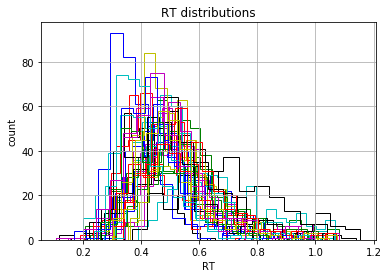

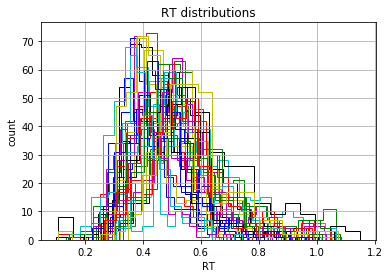

In [3]:
# load data from cateogriztion based on moral valence
dat_M_Categ_val = hddm.load_csv('MS_categ_val_hddm_stim.csv')
dat_M_Categ_val.head(10)

# load data from cateogriztion based on identity
dat_M_Categ_id = hddm.load_csv('MS_categ_id_hddm_stim.csv')
dat_M_Categ_id.head(10)

# flip the error RTs to be negative (shall we do this for the stimuli-code?)
#dat_M_Categ_val = hddm.utils.flip_errors(dat_M_Categ_val) 
#dat_M_Categ_id = hddm.utils.flip_errors(dat_M_Categ_id)

# check the RT distritubtion
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_Categ_val.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_Categ_val_flipped.pdf')  # save the plot if necessary
    
fig = plt.figure()
ax = fig.add_subplot(111, xlabel='RT', ylabel='count', title='RT distributions')
for i, subj_data in dat_M_Categ_id.groupby('subj_idx'):
    subj_data.rt.hist(bins=20, histtype='step', ax=ax)
# plt.savefig('plot_MS_Categ_id_flipped.pdf')

In [16]:
# parameters for modeling

nsample = 20000    # number of sampling
nburn   = 10000     # number of burn
# nchain  = 4        # number of chain

dateToday = 'final'     # using final instead of real date, str(date.today())

#### Valence-based task

In [ ]:
start_time = time.time()  # the start time of the processing
 
import warnings           # suppress the warnings
warnings.simplefilter('ignore')

#### model 1 for valence based categorization, free v,t,z
dbname = "M_Categ_val_vtz_s_" + dateToday + '_Chain_' +  str(i + 2) + '.db'
M_Categ_val_vtz_s = hddm.HDDMStimCoding(dat_M_Categ_val, include='z', stim_col='stim', 
                                        depends_on = {'v':['val','id'], 't':['val','id'], 'z':['val','id']},
                                        split_param='v', drift_criterion=True)
M_Categ_val_vtz_s.find_starting_values()
M_Categ_val_vtz_s.sample(nsample, burn = nburn, dbname=dbname, db='pickle')
   
# save the model
M_Categ_val_vtz_s.save("M_Categ_val_vtz_s_" + dateToday + '_Chain_' + str(i + 2))

# loading the existing model.
#M_Categ_val_vtz = hddm.load("M_Categ_val_vtz_s_" + dateToday + '_Chain_' + str(i + 2))

# DIC

print("M_Categ_val_vtz_s DIC: %f" % M_Categ_val_vtz_s.dic)  # -15301.678941

m1_time = time.time() # the start time of the processing
print("Running M1 used: %f " % (m1_time - start_time))

In [ ]:
## ppc
ppc_data_val_vtz_s = hddm.utils.post_pred_gen(M_Categ_val_vtz_s)
ppc_compare_val_vtz_s = hddm.utils.post_pred_stats(dat_M_Categ_val, ppc_data_val_vtz_s)  # MSE 0.031996
ppc_compare_val_vtz_s.to_csv('ppc_compare_val_vtz_s.csv', sep = ',')
#M_Categ_val_vtz_s.plot_posterior_predictive()

# M_match_vatz.plot_posterior_quantiles()
# M_match_vatz.plot_posteriors_conditions()
# M_match_vatz_data =  M_match_vatz.gen_stats

In [ ]:
# model 2, free v,z
dbname = "M_Categ_val_vz_s_" + 'final' + '_Chain_' +  str(i + 2) + '.db'
M_Categ_val_vz_s = hddm.HDDMStimCoding(dat_M_Categ_val, include='z', stim_col='stim', 
                                       depends_on = {'v':['val','id'], 'z':['val','id']},
                                       split_param='v', drift_criterion=True)
M_Categ_val_vz_s.find_starting_values()
M_Categ_val_vz_s.sample(nsample, burn = nburn, dbname=dbname+'.db', db='pickle')
M_Categ_val_vz_s.save(dbname)

## ppc
ppc_data_Categ_val_vz_s = hddm.utils.post_pred_gen(M_Categ_val_vz_s)
ppc_compare_Categ_val_vz_s = hddm.utils.post_pred_stats(dat_M_Categ_val, ppc_data_Categ_val_vz_s)  # MSE 
ppc_compare_Categ_val_vz_s.to_csv('ppc_compare_Categ_val_vz_s.csv', sep = ',')

#M_Categ_vt.plot_posterior_predictive()
# M_Categ_vt.plot_posterior_quantiles()

## DIC
print("M_Categ_val_vz DIC: %f" % M_Categ_val_vz_s.dic) # -8210

### Identity-based task

In [10]:
import warnings
warnings.simplefilter('ignore')

start_time = time.time()  # the start time of the processing

dbname = "M_Categ_id_vtz_s_" + dateToday + '_Chain_' +  str(i + 2) 
M_Categ_id_vtz_s = hddm.HDDMStimCoding(dat_M_Categ_id, include='z', stim_col='stim',
                                       depends_on = {'v':['val','id'], 't':['val','id'], 'z':['val','id']},
                                       split_param='v', drift_criterion=True, p_outlier=0.05)

M_Categ_id_vtz_s.find_starting_values()
M_Categ_id_vtz_s.sample(10000, burn = 5000, thin=2, dbname=dbname+'.db', db='pickle')

# save the model
M_Categ_id_vtz_s.save(dbname)
#M_Categ_id_vtz_s= hddm.load("M_Categ_val_vtz_s_" + dateToday + '_Chain_' + str(i + 2))

# DIC
print("M_Categ_id_vtz_s DIC: %f" % M_Categ_id_vtz_s.dic)  # -15387.274419

m1_time = time.time() # the start time of the processing
print("Running M1 used: %f " % (m1_time - start_time))

 [-----------------100%-----------------] 10001 of 10000 complete in 3581.3 secM_Categ_id_vtz_s DIC: -15049.889898
Running M1 used: 3613.958480 


Plotting a
Plotting a_std
Plotting v(Other.Bad)
Plotting v(Other.Good)
Plotting v(Self.Bad)
Plotting v(Self.Good)
Plotting v_std
Plotting t(Other.Bad)
Plotting t(Other.Good)
Plotting t(Self.Bad)
Plotting t(Self.Good)
Plotting t_std
Plotting z(Other.Bad)
Plotting z(Other.Good)
Plotting z(Self.Bad)
Plotting z(Self.Good)
Plotting z_std
Plotting dc
Plotting dc_std


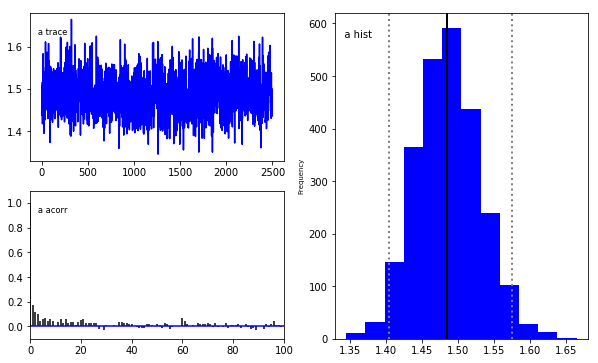

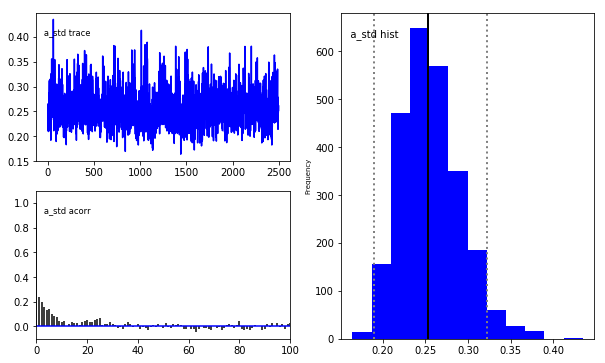

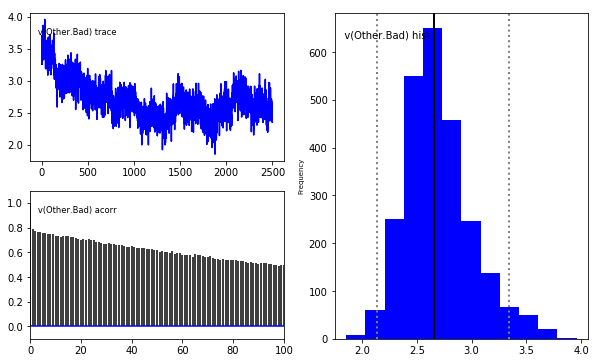

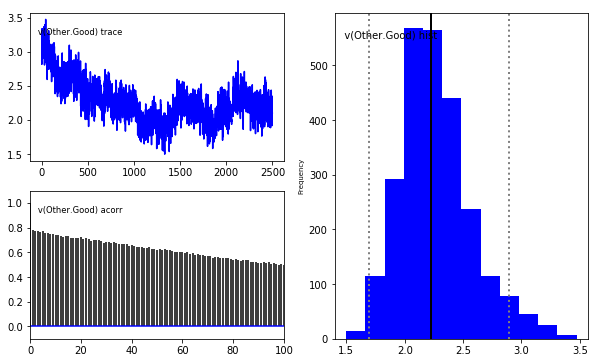

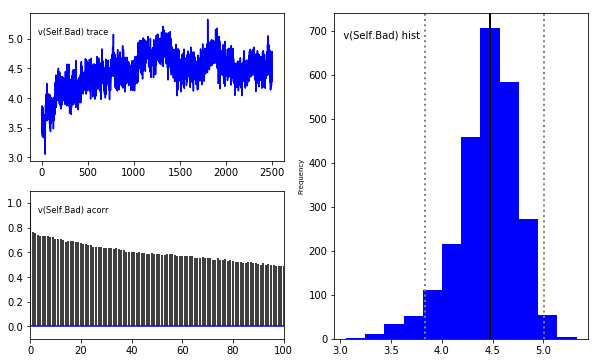

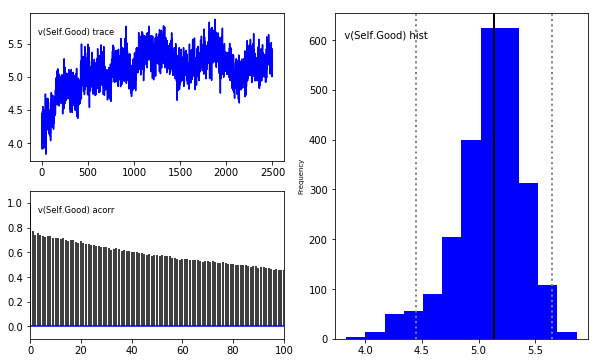

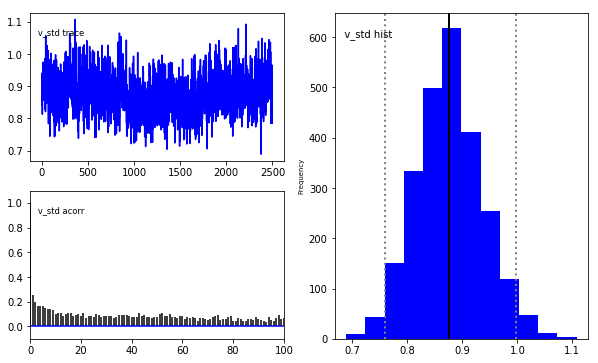

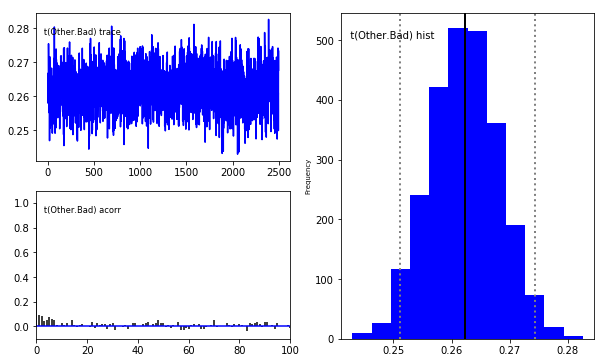

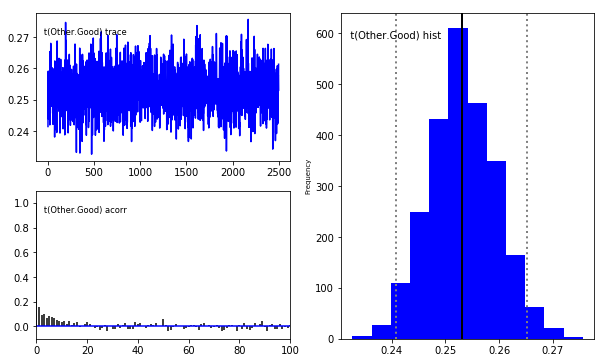

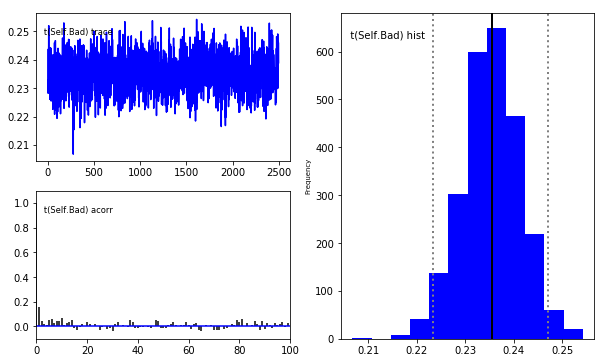

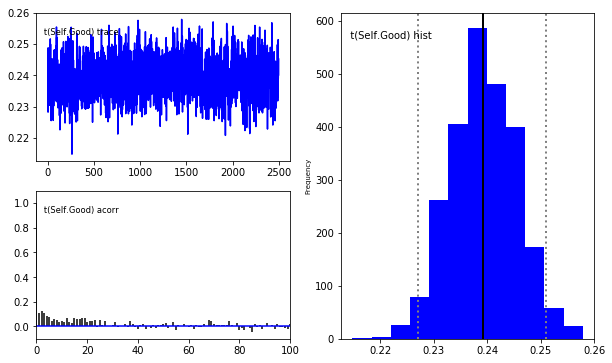

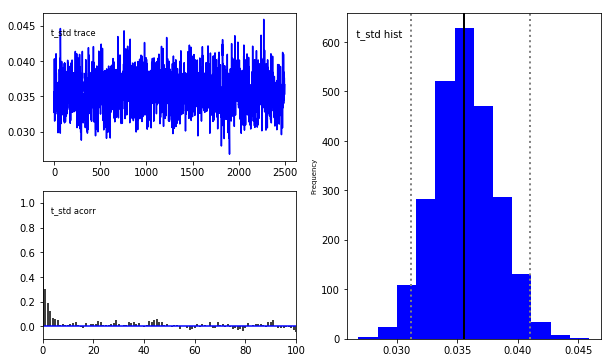

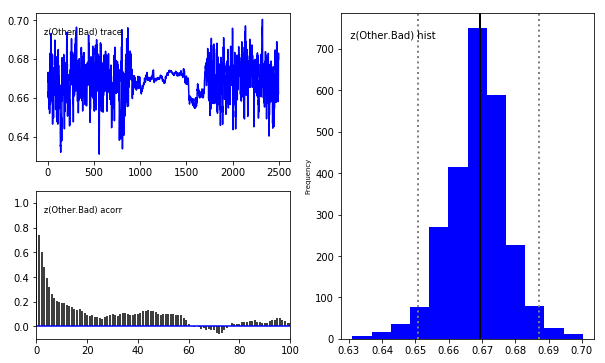

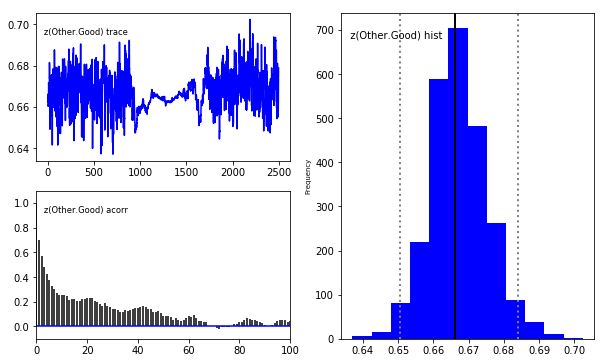

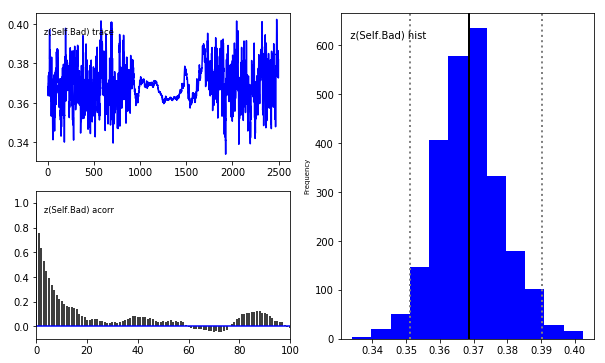

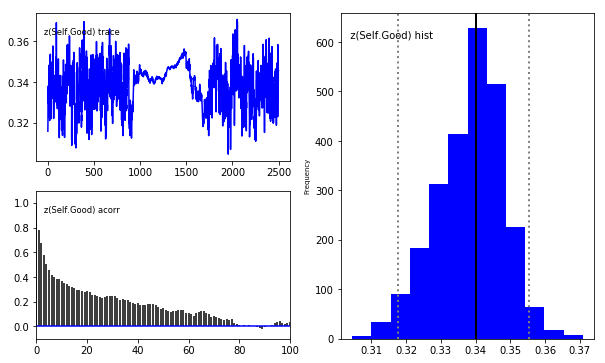

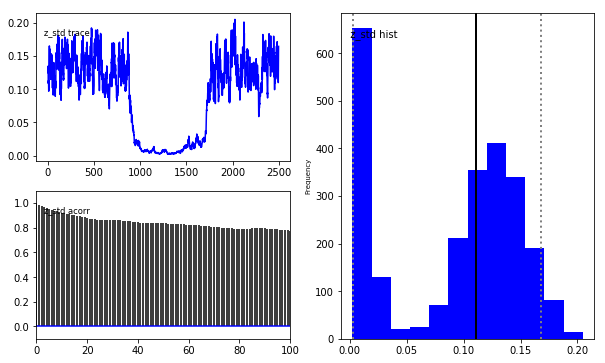

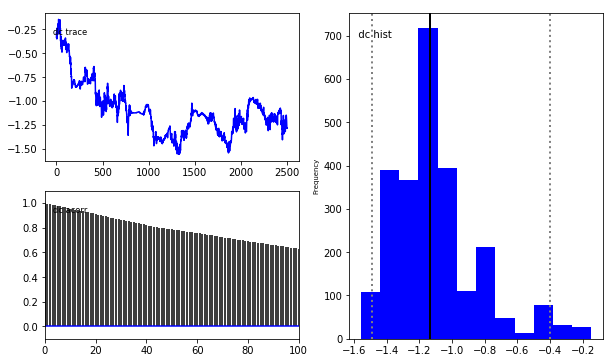

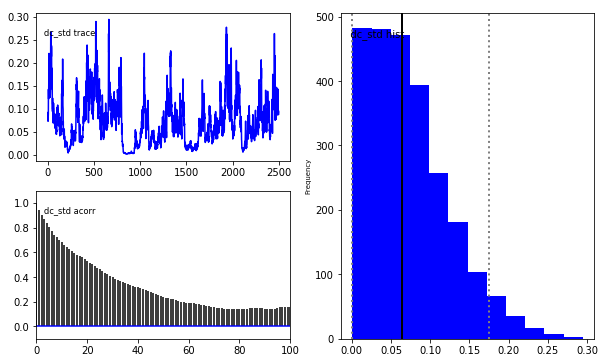

In [11]:
M_Categ_id_vtz_s.plot_posteriors() # check convergence

In [ ]:
## ppc
ppc_data_id_vtz_s    = hddm.utils.post_pred_gen(M_Categ_id_vtz_s)
ppc_compare_id_vtz_s = hddm.utils.post_pred_stats(dat_M_Categ_id, ppc_data_id_vtz_s)  # MSE 0.031996
ppc_compare_id_vtz_s.to_csv('ppc_compare_id_vtz_s.csv', sep = ',')
#M_Categ_id_vtz_s.plot_posterior_predictive()

# M_match_vatz.plot_posterior_quantiles()
# M_match_vatz.plot_posteriors_conditions()
# M_match_vatz_data =  M_match_vatz.gen_stats


In [18]:
# model 2, free v,z
dbname = "M_Categ_id_vz_s_" + dateToday + '_Chain_' +  str(i + 2) + '.db'
M_Categ_id_vz_s = hddm.HDDMStimCoding(dat_M_Categ_id, include='z', stim_col='stim', 
                                       depends_on = {'v':['val','id'], 'z':['val','id']},
                                       split_param='v', drift_criterion=True)
M_Categ_id_vz_s.find_starting_values()
M_Categ_id_vz_s.sample(nsample, burn = nburn, dbname='traces_id_vt_s.db', db='pickle')
M_Categ_id_vz_s.save(dbname)

# DIC
print("M_Categ_id_vz_s DIC: %f" % M_Categ_id_vz_s.dic)  # 

 [-----------------100%-----------------] 20000 of 20000 complete in 6919.0 secM_Categ_id_vz_s DIC: -14870.971695


Plotting a
Plotting a_std
Plotting v(Other.Bad)
Plotting v(Other.Good)
Plotting v(Self.Bad)
Plotting v(Self.Good)
Plotting v_std
Plotting t
Plotting t_std
Plotting z(Other.Bad)
Plotting z(Other.Good)
Plotting z(Self.Bad)
Plotting z(Self.Good)
Plotting z_std
Plotting dc
Plotting dc_std


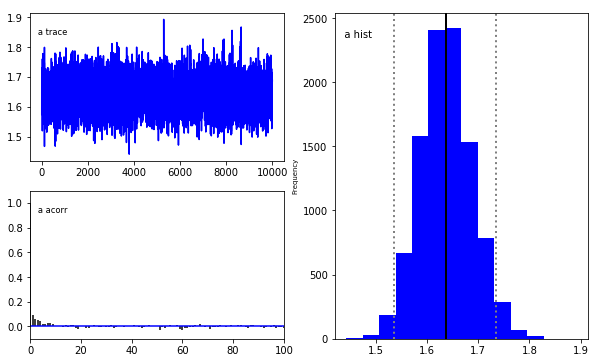

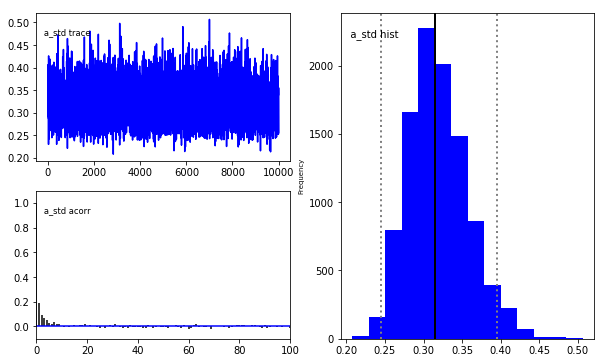

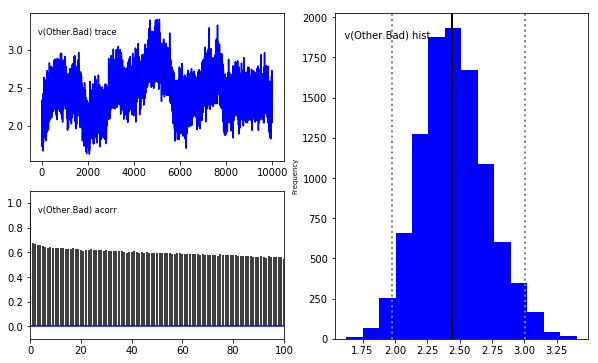

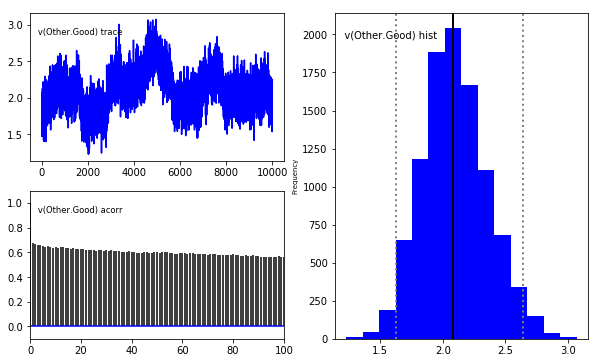

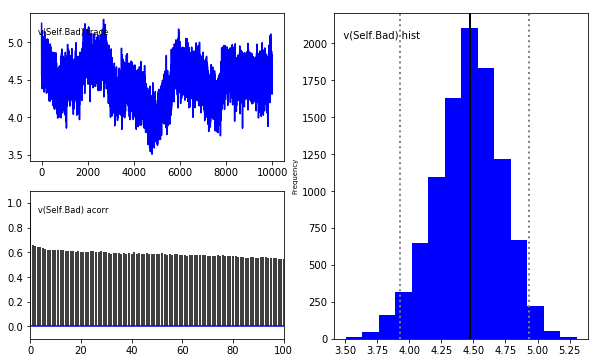

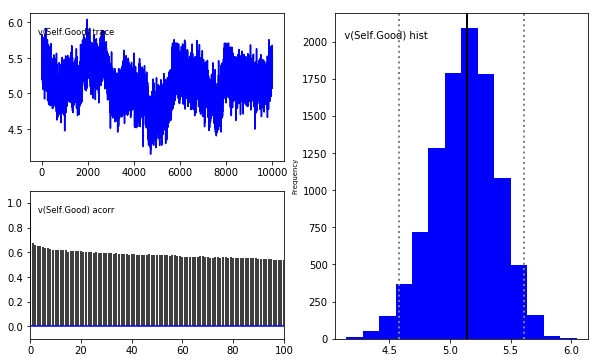

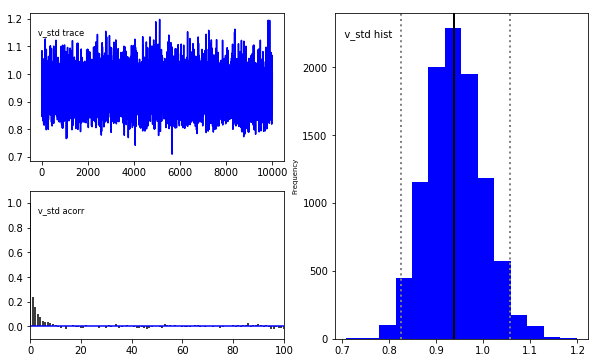

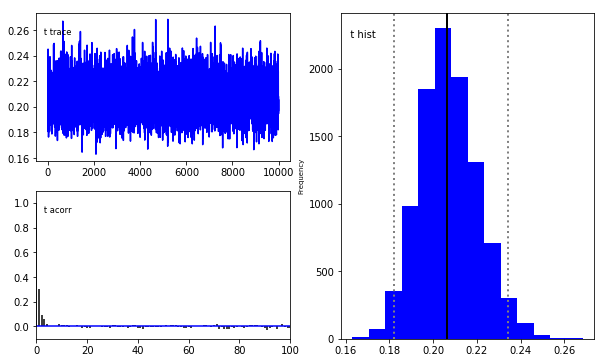

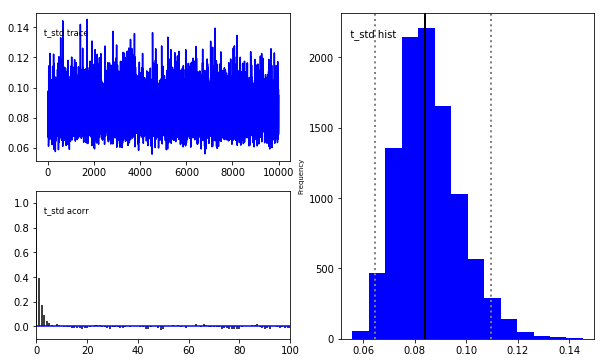

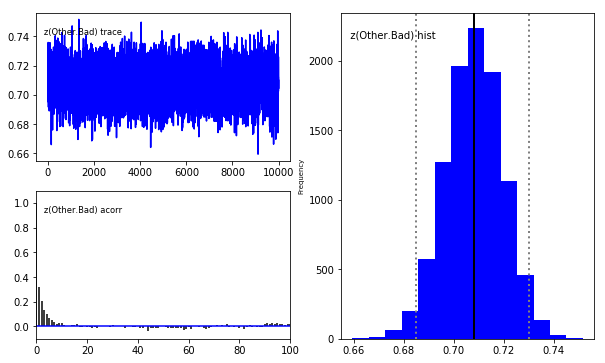

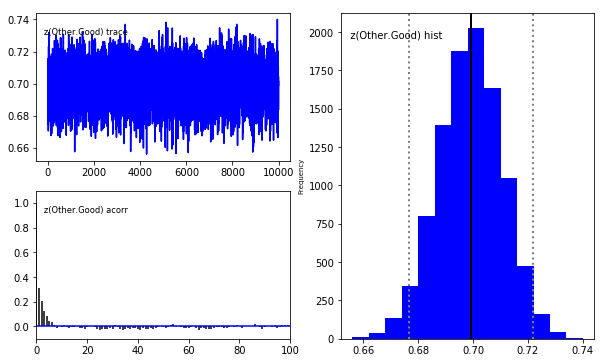

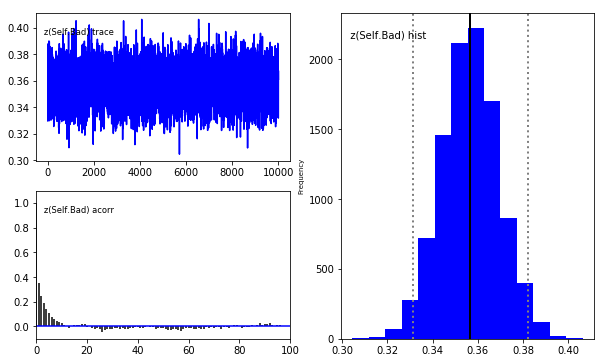

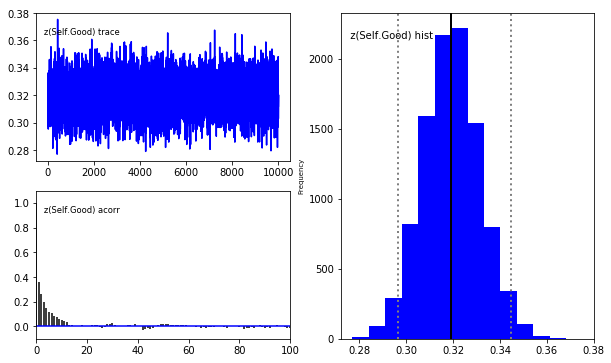

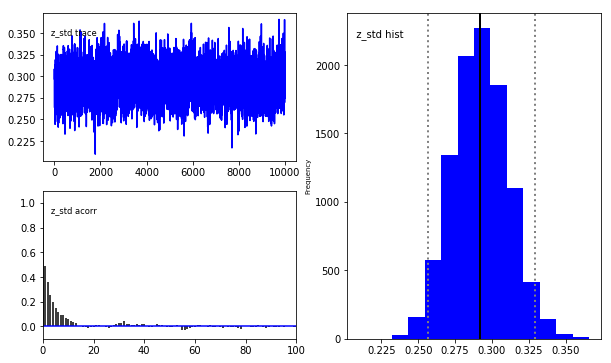

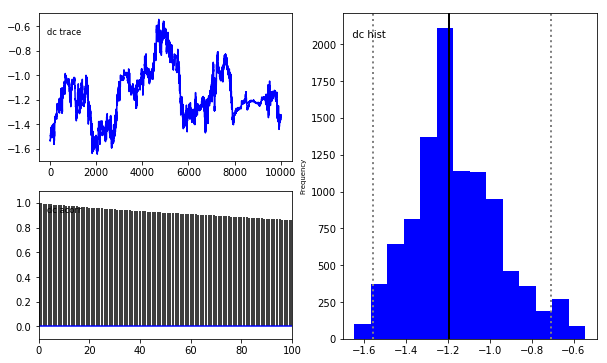

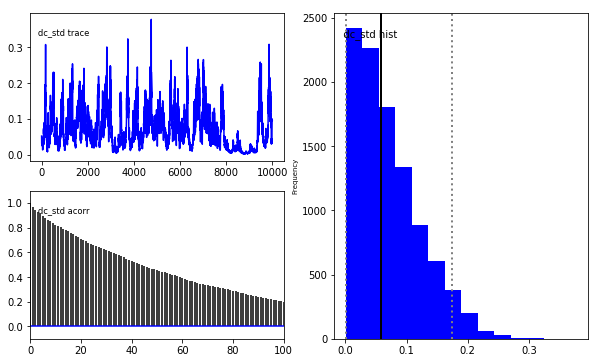

In [19]:
M_Categ_id_vz_s.plot_posteriors() # check convergence

In [ ]:
## ppc of model 2
ppc_data_Categ_id_vz_s = hddm.utils.post_pred_gen(M_Categ_id_vz_s)
ppc_compare_Categ_id_vz_s = hddm.utils.post_pred_stats(dat_M_Categ_id, ppc_data_Categ_id_vz_s)  # MSE 
ppc_compare_Categ_id_vz_s.to_csv('ppc_compare_Categ_id_vz_s.csv', sep = ',')


#### Check the results

In [ ]:
v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['v(Self.Good)','v(Self.Bad)','v(Other.Good)','v(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_val,v_BadSelf_val, v_GoodOther_val, v_BadOther_val])
plt.savefig('ex7_T_vzt_val_v_s.pdf')

z_GoodSelf_val,z_BadSelf_val, z_GoodOther_val, z_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['z(Self.Good)','z(Self.Bad)','z(Other.Good)','z(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([z_GoodSelf_val,z_BadSelf_val, z_GoodOther_val, z_BadOther_val])
plt.savefig('ex7_T_vzt_val_z_s.pdf')

t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val = M_Categ_val_vtz_s.nodes_db.node[['t(Self.Good)','t(Self.Bad)','t(Other.Good)','t(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([t_GoodSelf_val,t_BadSelf_val, t_GoodOther_val, t_BadOther_val])
plt.savefig('ex7_T_vzt_val_t_s.pdf')

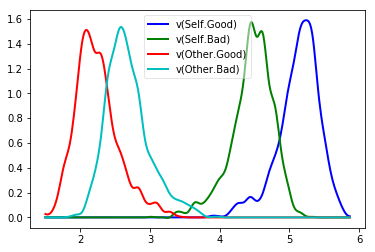

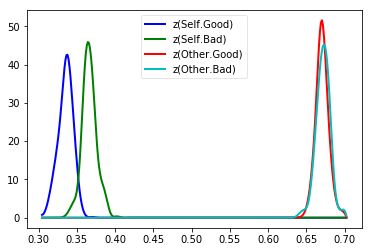

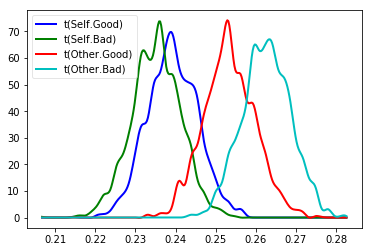

In [12]:
v_GoodSelf_id,v_BadSelf_id, v_GoodOther_id, v_BadOther_id = M_Categ_id_vtz_s.nodes_db.node[['v(Self.Good)','v(Self.Bad)','v(Other.Good)','v(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([v_GoodSelf_id,v_BadSelf_id, v_GoodOther_id, v_BadOther_id])
plt.savefig('ex7_T_vzt_id_v_s.pdf')

z_GoodSelf_id,z_BadSelf_id, z_GoodOther_id, z_BadOther_id = M_Categ_id_vtz_s.nodes_db.node[['z(Self.Good)','z(Self.Bad)','z(Other.Good)','z(Other.Bad)']]
hddm.analyze.plot_posterior_nodes([z_GoodSelf_id,z_BadSelf_id, z_GoodOther_id, z_BadOther_id]) 
plt.savefig('exp7_T_vzt_id_z_s.pdf') 

t_GoodSelf_id,t_BadSelf_id, t_GoodOther_id, t_BadOther_id    = M_Categ_id_vtz_s.nodes_db.node[['t(Self.Good)','t(Self.Bad)','t(Other.Good)','t(Other.Bad)']] 
hddm.analyze.plot_posterior_nodes([t_GoodSelf_id,t_BadSelf_id, t_GoodOther_id, t_BadOther_id]) 
plt.savefig('exp7_T_vzt_id_t_s.pdf') 

In [ ]:
# using absolute value for "bad" conditions 
print("P(v_M_GoodSelf > v_M_BadSelf ) = ", (v_GoodSelf_val.trace() > abs(v_BadSelf_val.trace())).mean())       # 0.998
print("P(v_M_GoodOther > v_M_BadOther ) = ", (v_GoodOther_val.trace() > abs(v_BadOther_val.trace())).mean())   # 0.1292
print("P(v_M_GoodSelf > v_M_GoodOther ) = ", (v_GoodSelf_val.trace() > v_GoodOther_val.trace()).mean())        # 0.992
print("P(v_M_BadSelf > v_M_BadOther ) = ", abs((v_BadSelf_val.trace()) > abs(v_BadOther_val.trace())).mean())  # 0.0

In [7]:
# using absolute value for "other" conditions 
print("P(v_I_GoodSelf > v_I_BadSelf ) = ", (v_GoodSelf_id.trace() > v_BadSelf_id.trace()).mean())                 # 0.999
print("P(v_I_GoodOther > v_I_BadOther ) = ", abs((v_GoodOther_id.trace()) > abs(v_BadOther_id.trace())).mean())   # 0
print("P(v_I_GoodSelf > v_I_GoodOther ) = ", (v_GoodSelf_id.trace() >  abs(v_GoodOther_id.trace())).mean())       # 0.999
print("P(v_I_BadSelf > v_I_BadOther ) = ", (v_BadSelf_id.trace() > abs(v_BadOther_id.trace())).mean())            # 0.002

P(v_I_GoodSelf > v_I_BadSelf ) =  0.9986
P(v_I_GoodOther > v_I_BadOther ) =  0.0214
P(v_I_GoodSelf > v_I_GoodOther ) =  1.0
P(v_I_BadSelf > v_I_BadOther ) =  0.9992


In [ ]:
# doing Gelman-Rubin statistic for valence-based categorization
models_categ_val = []
for i in range(5):
    m_stim = hddm.HDDMStimCoding(dat_M_Categ_val, include='z', stim_col='stim', 
                                depends_on = {'v':['val','id'], 't':['val','id'], 'z':['val','id']},
                                split_param='v',drift_criterion=True)
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_categ_val.append(m_stim)

Categ_val_R_hat_vtz = hddm.analyze.gelman_rubin(models_categ_val)

# save Categ_R_hat_vtz
with open('Categ_val_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Categ_val_R_hat_vtz.items())
    

In [15]:
# doing Gelman-Rubin statistic for Id-based categorization
models_categ_id = []
for i in range(5):
    print('processing Model ', i)
    m_stim = hddm.HDDMStimCoding(dat_M_Categ_id,
                                 include='z', 
                                 stim_col='stim',
                                 depends_on = {'v':['val','id'], 't':['val','id'], 'z':['val','id']},
                                 split_param='v', drift_criterion=True)
    m_stim.find_starting_values()
    m_stim.sample(nsample, burn = nburn)
    models_categ_id.append(m_stim)

Categ_id_R_hat_vtz = hddm.analyze.gelman_rubin(models_categ_id)

# save Categ_R_hat_vtz
with open('Categ_id_R_hat_vtz_stim.csv','w') as f:
    w = csv.writer(f)
    w.writerows(Categ_id_R_hat_vtz.items())

 [-----------------100%-----------------] 20000 of 20000 complete in 8027.6 sec